In [ ]:
pip install geopandas contextily

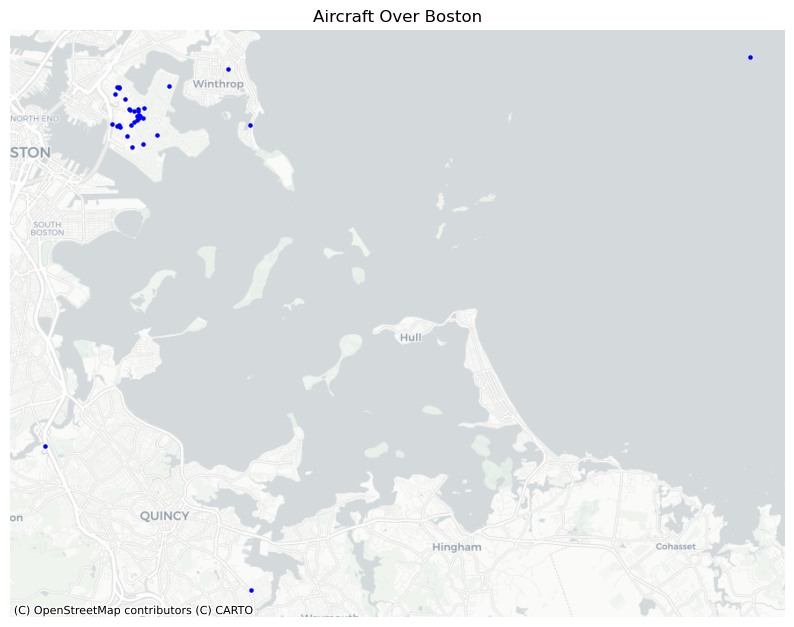

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Load data
df = pd.read_csv('boston_air_traffic.csv')
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

# Convert coordinates to Web Mercator (EPSG:3857) for use with contextily
gdf = gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))  # You can adjust the figure size as needed

# Add the geodataframe to the axes
gdf.plot(ax=ax, marker='o', color='blue', markersize=5)  # Red circles for aircraft positions

# Add basemap with contextily
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Set axis options
ax.set_axis_off()  # Turn off the axis

plt.title('Aircraft Over Boston')  # Title for the map
plt.show()